<a href="https://colab.research.google.com/github/SrMouraSilva/Introducao-a-Modelagem/blob/main/3_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Programação simbólica
from sympy import *
from sympy.plotting import plot, plot3d
 
# Exibir símbolos nos plots
from google.colab.output._publish import javascript
url = "https://cdnjs.cloudflare.com/ajax/libs/mathjax/3.1.2/latest.js?config=default"
 
javascript(url=url)
from IPython.display import Math

# Manipulação dos dados
import numpy as np
import pandas as pd
 
# Gráficos
import matplotlib as mpl
import matplotlib.pyplot as plt
 
import seaborn as sns
sns.set_theme()

In [ ]:
mpl.rcParams['figure.figsize'] = (12,8)
mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 14

## Questão 3.6

Reconsider the facility location problem of Example 3.2, but now assume that the response time from point $(x_0, y_0)$ to point $(x_1, y_1)$ is proportional to the road travel distance $|x_1−x_0|+|y_1−y_0|$.

Relembrando o Exemplo 3.2

> **Exemplo 3.2:** A suburban community intends to replace its old fire station with a new facility. The old station was located at the historical city center.City planners intend to locate the new facility more scientifically. A statistical analysis of response-time data yielded an estimate of $3.2 + 1.7r^{0.91}$ minutes required to respond to a call $r$ miles away from the station. (The derivation of this formula is the subject of Exercises 17 and 18 in Chapter 8). Estimates of the frequency of calls from different areas of the city were obtained from the fire chief. They are presented in Figure 3.7. Each block represents one square mile, and the numbers inside each block represent the number of emergency calls peryear for that block. Find the best location for the new facility.

**AVISO:** Dado que o item a) é baseado em um método aleatório, atente-se que a execução do código novamente gerará valores diferentes. No decorrer da questão, as comparações entre valores foram feitas via código.

### a) Find the location that minimizes average response time.  Use the five-step method, and model as a multivariable unconstrained optimization problem.

#### Passo 1 - Variáveis

* $x$
* $y$



#### Passo 1 - Suposições do problema

In [ ]:
x, y = var('x y', real=True)

#### Passo 2 - Abordagem de modelagem

A abordagem do modelo é um problema de otimização multidimensional sem restrição cujo objetivo é minimizar o tempo médio de resposta. A abordagem de resolução se dará pelo Método de Busca Aleatória.

#### Passo 3 - Formulação do modelo

$$
\begin{align}
\text{min} ~~& f(x, y) \\
\text{sujeito a} ~~& x, y \in \Omega \\
\end{align}
$$

Sendo:
* $f(x, y)$: Função objetivo
* $\Omega$: Espaço viável das variáveis do problema.

Desta forma, temos:

$$
\begin{align}
\text{min} ~~& f(x, y) \\
\text{sujeito a} ~~ & 0 \leq x \leq 6 \\
                    & 0 \leq y \leq 6
\end{align}
$$

#### Passo 4 - Resolução do modelo

Função a ser otimizada:

In [ ]:
elementos = [
    [6, 8, 8, 21, 6, 3, 18, 8, 6],
    [1, 3, 5, 1, 3, 5, 1, 3, 5],
    [5, 5, 5, 3, 3, 3, 1, 1, 1]
]

r = np.sum([
    a * (abs(x-b) + abs(y-c))**0.91
    for a, b, c in zip(*elementos)
])

f = 3.2 + Rational(1.7, 84) * r


Math(f"f(x, y) = {latex(f)}")

<IPython.core.display.Math object>

Sua representação gráfica em três dimensões é apresentada abaixo. Note que restringimos o espaço de acordo com as restrições do problema.

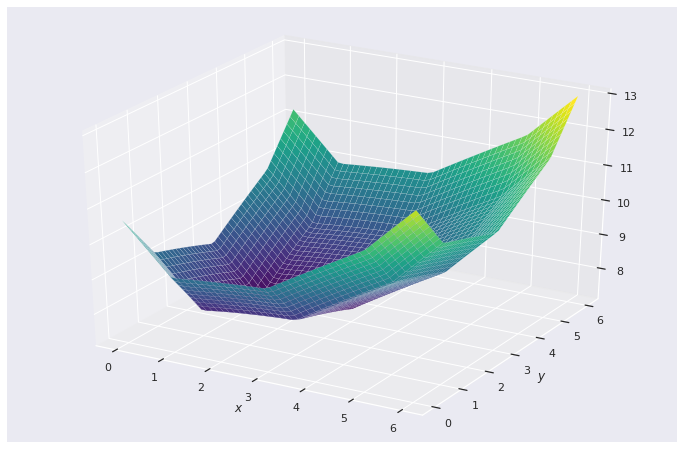

In [ ]:
plot3d(f, (x, 0, 6), (y, 0, 6), xlabel='$x$', ylabel='$y$')

O método de busca aleatória para localizar o menor valor:

In [ ]:
from random import uniform
import math

def MetodoBuscaAleatoria(variaveis, limites, funcao, numero_iteracoes=10):
    num_variaveis = len(variaveis)
    x_ = np.zeros((num_variaveis, numero_iteracoes))

    f = lambdify(variaveis, funcao, 'numpy')
    f_min = math.inf
    variaveis_min = np.ones([1, num_variaveis]) * math.inf

    for k in range(numero_iteracoes):
        x_k = x_[:, [k]]
        
        # Obter valor aleatório para cada variável
        for i, variavel in enumerate(variaveis):
            x_k[i][0] = uniform(*limites[variavel])
        
        if f_min > f(*x_k):
            f_min = f(*x_k)
            variaveis_min = x_k

        x_[:, k] = x_k.T

    retorno = {f'{variavel}': x_[i] for i, variavel in enumerate(variaveis)}
    retorno[f'f{Tuple(*variaveis)}'] = [f(*x_i) for x_i in x_.T]

    return pd.DataFrame(retorno), f_min[0], tuple(*variaveis_min.T)

Aplicando-o para achar o mínimo, são testados os seguintes pontos:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


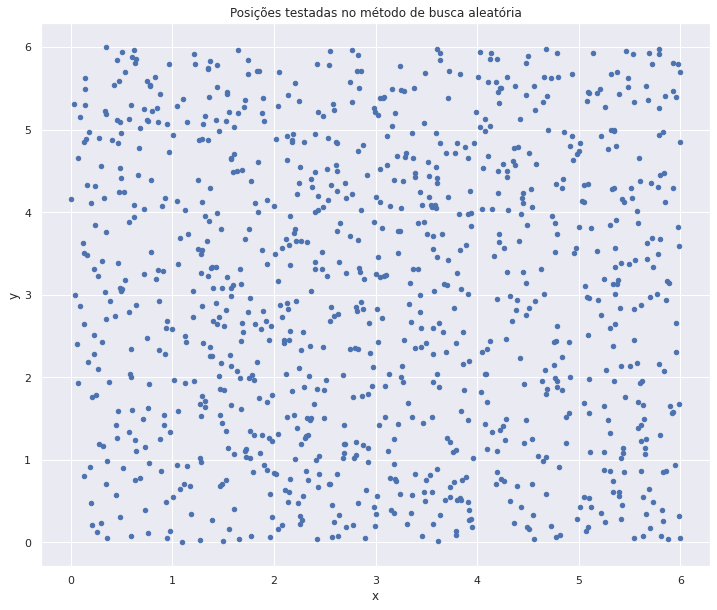

In [ ]:
resultado_a = MetodoBuscaAleatoria(
    variaveis=(x, y),
    limites={
        x: [0, 6],
        y: [0, 6]
    },
    funcao=f,
    numero_iteracoes=1_000 #100_000
)

#resultado_a[0].plot.scatter(x='x', y='y', s=.05, figsize=(12, 10), title='Posições testadas no método de busca aleatória')
resultado_a[0].plot.scatter(x='x', y='y', figsize=(12, 10), title='Posições testadas no método de busca aleatória')

O menor valor encontrado corresponde a

In [ ]:
Math(f"""
\\begin{{aligned}}
x &= {resultado_a[2][0]}\\\\
y &= {resultado_a[2][1]}\\\\
f(x={resultado_a[2][0]}, y={resultado_a[2][1]}) &= {resultado_a[1]}
\\end{{aligned}}
""")

<IPython.core.display.Math object>

#### Passo 5 - Resposta da pergunta



A localização ótima e o tempo médio de resposta da localização ótima são:

In [ ]:
Math(f"""
\\begin{{aligned}}
x &= {resultado_a[2][0]}\\\\
y &= {resultado_a[2][1]}\\\\
f(x={resultado_a[2][0]}, y={resultado_a[2][1]}) &= {resultado_a[1]}
\\end{{aligned}}
""")

<IPython.core.display.Math object>

### b) Examine the sensitivity of the optimal location to the estimated number of emergencies in each 2×2–mile sector. Can you draw any general conclusions?

Para testar a sensibilidade do ponto ótimo, executaremos novamente, porém iremos tirar as emergências de cada setor, um por vez. Ou seja, na primeira execução, removeremos as chamadas de emergência do primeiro setor, na segunda execução, as chamadas de emergência do primeiro setor são repostas e as do segundo setor são tiradas e assim sucessivamente.

In [ ]:
resultados_b = []

for i in range(9):
    elementos_b = [
        [6, 8, 8, 21, 6, 3, 18, 8, 6],
        [1, 3, 5, 1, 3, 5, 1, 3, 5],
        [5, 5, 5, 3, 3, 3, 1, 1, 1]
    ]

    elementos_b[0][i] = 0  # Remover emergência do i-ésimo setor
    total_chamadas_emergencia = sum(elementos_b[0])
    
    r_b = np.sum([
        a * (abs(x-b) + abs(y-c))**0.91
        for a, b, c in zip(*elementos)
    ])
    f_b = 3.2 + 1.7 * r_b / total_chamadas_emergencia

    resultados_b.append(
        MetodoBuscaAleatoria(
            variaveis=(x, y),
            limites={
                x: [0, 6],
                y: [0, 6]
            },
            funcao=f,
            numero_iteracoes=1_000
        )
    )

Teremos os seguintes resultados

In [ ]:
pd.DataFrame({
    'Setor com emergências retiradas': range(1, 10),
    'x ótimo': [res[2][0] for res in resultados_b],
    'y ótimo': [res[2][1] for res in resultados_b],
    'f(x, y) ótimo': [res[1] for res in resultados_b]
})

,Setor com emergências retiradas,x ótimo,y ótimo,"f(x, y) ótimo"
0,1,1.004635,2.970873,7.163110
1,2,1.230547,3.036044,7.233897
2,3,0.995439,2.805061,7.242897
3,4,1.175783,2.957423,7.212218
4,5,1.008804,3.028835,7.174399
5,6,1.253694,2.968506,7.224322
6,7,0.982272,3.031216,7.201449
7,8,1.144379,2.972036,7.198886
8,9,0.983944,3.024473,7.193185


Pela tabela acima, podemos observar que há pequenas mudanças para a localização ótima e o tempo médio de resposta da localização ótima se comparados com os valores do item a) mesmo o número de emergências em cada setor sendo alterado. Logo, a localização ótima não é sensível para o número estimado de emergências em cada setor. 

### c) Comment on the robustness of this model. Compare the optimal location to that obtained in the analysis of Section 3.2. What do you think would happen if we assumed that response time was proportional to the straight–line distance $r=\sqrt{(x_1−x_0)^2 + (y_1−y_0)^2}$?

Para fazermos uma comparação entre a localização ótima encontrada no exemplo 3.2 e a localização ótima obtida no item $a)$ desta questão é preciso calcular o erro relativo das variáveis de x e y:

In [ ]:
Math(f"""
\\begin{{aligned}}
r_x &= \\left|\\frac{{{resultado_a[2][0]} - 1.66}}{{{resultado_a[2][0]}}}\\right| = {abs(resultado_a[2][0] - 1.66)} \\\\
r_y &= \\left|\\frac{{{resultado_a[2][1]} - 2.73}}{{{resultado_a[2][1]}}}\\right| = {abs(resultado_a[2][1] - 2.73)}
\\end{{aligned}}
""")

<IPython.core.display.Math object>

Logo, o modelo desta questão não é robusto, pois o erro relativo de cada variável não é próximo de zero. Com isso, não podemos assumir que o tempo de resposta é proporcional a distância $r=\sqrt{(x_1−x_0)^2 + (y_1−y_0)^2}$ já que a comparação feita entre os dois modelos não foi satisfatória.